In [98]:
import pickle
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, MeanShift, estimate_bandwidth
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score


# Load Data

In [2]:
with open('rDemocrats_doc_topic.pickle', 'rb') as read_file:
    doc_topic = pickle.load(read_file)

In [5]:
doc_topic.head()

,2016_election_frustration,impeachment_proceedings,healthcare,primary_candidates,gun_control,election_general_terms,right_wing_media,impeachment,yang_ubi,primary_debates,bloomberg,econ_trump_vs_obama,race_identity,tax_return_ukraine_biden,election_midwest_swing,monetary_policy,rep_dem_comparison,miltary_and_immigration
0,0.123343,0.012851,0.013812,0.000000,0.000000,0.272942,0.077024,0.041799,0.023813,0.000000,0.000000,0.038714,0.000000,0.032714,0.000000,0.019753,0.185941,0.000000
1,0.020968,0.000000,0.024317,0.000000,0.116667,0.000000,0.144040,0.000000,0.166745,0.000000,0.095996,0.000000,0.131210,0.175204,0.000000,0.091814,0.119905,0.175758
2,0.004293,0.000000,0.000000,0.301581,0.007249,0.481218,0.057271,0.000000,0.000000,0.679723,0.000000,0.000000,0.150709,0.139188,0.258184,0.024112,0.000000,0.000000
3,1.684889,0.000000,0.000000,0.000000,0.000000,1.611127,0.000000,0.000000,0.122590,0.991394,0.015548,0.000000,0.000000,0.000000,0.000000,0.000000,5.059478,0.000000
4,0.000000,0.000000,0.495509,0.429306,0.143234,0.000000,0.000000,0.000000,0.529382,0.560277,0.000000,0.000000,0.005820,0.149024,0.000000,0.000000,0.000000,0.283183


In [47]:
scaler = StandardScaler()
doc_topic_std = scaler.fit_transform(doc_topic)

# Clustering

## K-means

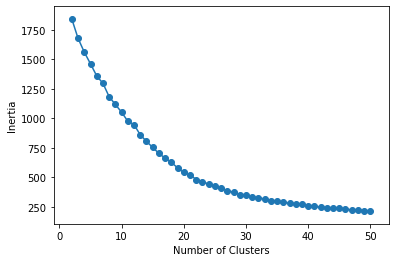

In [41]:
inertia = []
sil_scores = []
list_num_clusters = list(range(2,51))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters, random_state=42)
    preds = km.fit_predict(doc_topic)
    inertia.append(km.inertia_)
    sil_scores.append(silhouette_score(doc_topic_std, preds))
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

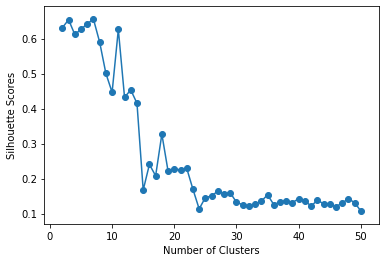

In [42]:
plt.plot(list_num_clusters,sil_scores)
plt.scatter(list_num_clusters,sil_scores)
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Scores');

In [52]:
km = KMeans(n_clusters=11, random_state=42)
km_model = km.fit_predict(doc_topic_std)
pd.DataFrame(km_model).iloc[:, 0].value_counts()

0     518
4      54
1      21
9       4
10      1
8       1
7       1
6       1
5       1
3       1
2       1
Name: 0, dtype: int64

In [45]:
# Dimensionality might be too high
# lots of outliers, let's try a non-partioning algo
# seems like there's one dense region and then lots of outliers

## DBSCAN

In [84]:
db = DBSCAN(eps=.2, min_samples=10, metric='cosine').fit(doc_topic_std)
pd.DataFrame(db.labels_).iloc[:, 0].value_counts()

-1    268
 0    265
 1     59
 2     12
Name: 0, dtype: int64

## Hierarchical Clustering

In [97]:
db = AgglomerativeClustering(n_clusters=None, distance_threshold=.8, linkage='average', affinity='cosine').fit(doc_topic_std)
pd.DataFrame(db.labels_).iloc[:, 0].value_counts()

4     142
1      75
3      68
5      55
10     45
0      38
12     32
9      24
7      24
2      21
13     21
14     20
6      17
15     15
16      3
11      3
8       1
Name: 0, dtype: int64

## Mean Shift

In [115]:
# estimate bandwidth 
bandwidth = estimate_bandwidth(doc_topic_std, quantile=0.9, random_state=42)

ms = MeanShift(bandwidth=bandwidth, cluster_all=False)
ms.fit(doc_topic_std)
pd.DataFrame(ms.labels_).iloc[:, 0].value_counts()

 0     563
-1      16
 1       2
 2       2
 22      1
 10      1
 3       1
 4       1
 5       1
 6       1
 7       1
 8       1
 9       1
 11      1
 21      1
 23      1
 13      1
 14      1
 15      1
 16      1
 17      1
 18      1
 19      1
 20      1
 12      1
Name: 0, dtype: int64

## Spectral Clustering Affinity Propogation

In [126]:
from sklearn.cluster import SpectralClustering
sc = SpectralClustering(n_clusters=3, random_state=42)
ypred = sc.fit_predict(doc_topic_std)
pd.DataFrame(ypred).iloc[:, 0].value_counts()

/Users/willyraedy/opt/anaconda3/envs/metis/lib/python3.7/site-packages/sklearn/cluster/spectral.py:268: ConvergenceWarning: Number of distinct clusters (2) found smaller than n_clusters (3). Possibly due to duplicate points in X.
  n_init=n_init)


2    603
1      1
Name: 0, dtype: int64

In [125]:
pd.DataFrame(doc_topic_std)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,-0.445058,-0.087710,-0.130271,-0.371049,-0.184342,0.127836,-0.194211,-0.360795,-0.269443,-0.275760,-0.225698,-0.163842,-0.352151,-0.158517,-0.374221,-0.106184,-0.016993,-0.293918
1,-0.774644,-0.112788,-0.106035,-0.371049,0.016626,-0.440204,-0.038318,-0.458264,0.132230,-0.275760,0.010114,-0.250535,0.006804,0.233129,-0.374221,0.087340,-0.213302,0.136585
2,-0.828327,-0.112788,-0.162139,0.296020,-0.171856,0.561295,-0.240161,-0.458264,-0.336362,1.096727,-0.225698,-0.250535,0.060148,0.134136,0.319860,-0.094477,-0.569756,-0.293918
3,4.582201,-0.112788,-0.162139,-0.371049,-0.184342,2.912836,-0.373385,-0.458264,0.008144,1.726048,-0.187505,-0.250535,-0.352151,-0.248435,-0.374221,-0.159232,14.471034,-0.293918
4,-0.842149,-0.112788,0.981123,0.578535,0.062388,-0.440204,-0.373385,-0.458264,1.151322,0.855543,-0.225698,-0.250535,-0.336230,0.161171,-0.374221,-0.159232,-0.569756,0.399713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
599,0.665411,0.066848,-0.162139,-0.310254,0.164798,0.428696,-0.066897,0.836319,-0.140144,-0.275760,-0.225698,0.116743,-0.237847,-0.243842,-0.374221,-0.159232,0.253039,-0.201828
600,-0.842149,0.092763,-0.162139,-0.371049,-0.068584,0.396643,-0.373385,0.665417,-0.336362,-0.275760,0.203023,0.126854,-0.352151,-0.248435,1.177999,-0.159232,-0.569756,1.009103
601,-0.842149,-0.101190,-0.162139,-0.371049,-0.116483,-0.254260,-0.373385,0.121363,-0.336362,-0.275760,-0.210927,-0.250535,-0.125483,-0.248435,-0.245462,-0.134430,0.477053,-0.128565
602,-0.292599,-0.112788,-0.003965,-0.167978,-0.184342,0.070323,-0.373385,-0.145450,-0.078510,0.074643,-0.138686,-0.250535,-0.287796,-0.248435,-0.351668,-0.159232,-0.266771,-0.293918


# Take Aways

- Lots of outliers and then one dense region
- Perhaps consider dropping a bunch of the common words
    - play with max_df
    - In theory, the topics sharing words is making the clustering break down
